# Day One: SESSION 2

# What is the Natural Language Toolkit (NLTK)?
NLTK is a Python Library for working with written language data. It is free, open source and well documented. The toolkit supports at least 40 different languages and is now used in university courses around the world.

There is an extensive and accessible companion book available free [online](http://www.nltk.org/book/). Many areas covered in this chapter are covered in more detail in the book.

_Note: NLTK provides tools for tasks ranging from very simple (counting words in a text) to very complex (writing and training parsers, etc.). Many advanced tasks are beyond the scope of this chapter_

NLTK is a power tool. Most only use a fraction of its functions for a specific purpose. We will be using NLTK to preprocess and analysis Twitter data. Although we will use methods relevant to Twitter data, some of the methods and techniques used will be applicable to a variety of data. You will learn to analyse this data with some basic textual analytic tools, including counting word frequencies, concordancing and collocational analysis. 

Many other forms of analysis are possible in NLTK, including sentiment analysis. There are beyond the scope of this workshop, but many of the concept learnt here will help you if you wish to extend your knowledge later.



# Install instructions

_**Install NLTK:**_ Open the Jupyter Notebook on your machine and install NLTK by typing the following commands into a fresh Jupyter Notebook.

![](http://localhost:8888/files/Documents/DatStory/images/nltk_download.png)



You can also follow the instructions on the nltk.org [site](http://www.nltk.org/install.html).



# Textual Analysis with NLTK
Before we dive into processing an analysing your own data, we'll give you can idea of what NLTK can do by working on some pre-processed practice data that comes with NLTK. 

Often it is easier (computationally) to analyse our data, then to upload and pre-process our data. So we'll start back-the-front.

Start by importing NLTK

In [1]:
import nltk
import numpy
%matplotlib inline
import pylab

Next, we'll import the example corpora from the nltk book module (the * means 'the lot').

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Importing the book has assigned variable names to ten corpora. We can 'call' these names easily:

In [3]:
my_variable = "the quality of mercy is not strained..."

Texts ``text1, text2, text3`` etc... are call _**variables**_. In computer programming, variables are data (e.g. “Sense and Sensibility by Jane Austen 1811”) paired with an associated symbolic name or identifier (e.g. 'text2' in the code above). Variables are assigned in python with the ``=`` sign.

Try assigning and calling your own variable. Here's my example below:

In [4]:
my_variable

'the quality of mercy is not strained...'

## Python syntax
The syntax of the Python programming language is the set of rules that defines how a Python program will be written and interpreted (by both computers and by human readers).

Python was designed to be a highly readable language. It has a relatively uncluttered visual layout and uses English keywords frequently where other languages use punctuation. So it's really the perfect computer language for our purposes.
The syntax we'll use the most are two types of commands; one that looks like this ``len(something)`` and another that look like this ``something.count()``

Both need an object (text data in our case) to work on; for example, ``len(text1)`` or ``text1.count("Whale")``.

## Exploring vocabulary
NLTK makes it really easy to get basic information about the size of a text and the complexity of its vocabulary.
``len(text1)`` gives the number of symbols or 'tokens' in your text. This is the total number of words and items of punctuation.
``set(text2)`` gives you a list of all the tokens in the text, without the duplicates.
Hence, ``len(set(text3))`` will give you the total number unique tokens. Remember this still includes punctuation.
``sorted(text4)`` places items in the list into alphabetical order, with punctuation symbols and capitalised words first.
Please note that all these commands use the same syntax; this is the first python syntax we'll learn.


In [7]:
len(set(text3))

2789

In [5]:
len(text3)

44764

## Using Jupyter as a calculator
We can use the Jupyter environment as an overblown calculator; try doing some basic mathematics with python. Hint: use ``*`` and ``/`` like your smartphone.

In [6]:
3/4

0.75

The expression that you just wrote above is the most basic programming instruction in the Python language. It includes values (the numbers) and operators (``* + -`` etc...) and always evaluate/reduce down to one value.

_**Operators**_ are important and we can do more with them than multiply. We can ask Jupyter if something is equal to ``==`` or not equal to ``!=`` and a number of others. Try it!

In [8]:
3 == 4

False

In [9]:
3 != 4

True

In [10]:
not True

False

Handy! This introduces us to _**boolean operators**_. Jupyter is telling me whether the expressions I've type are True or False. You can find more on boolean operators [here](https://docs.python.org/3/library/stdtypes.html?highlight=boolean%20operators).

#### 1. Challenge!
We can investigate the lexical richness of a text. For example, by dividing the total number of words by the number of unique words, we can see the average number of times each word is used.

For this challenge you will have to combine your knowledge of the syntax we've learnt so far and Jupyter's mathematical abilities.

Have a go at calculating the lexical richness of text3 i.e. the length or ``len()`` of ``text3`` divided by the length of the set or ``set()`` of ``text3``.

We can also count the number of times a word is used and calculate what percentage of the text it represents. But to do this we need to learn some new syntax. Methods that use dot notation only work with _**strings**_; on the other hand, ``len()`` and ``sorted()`` can work on other data types. Fortunately, we're mostly interested in strings.


In [20]:
len(text8)/len(set(text8))

4.39259927797834

Try exchanging ``"America"`` with any word of your choice (note that it may not be in the corpus). Tip: you can tell that "America" is a string because it is surrounded by quotation marks, unlike, say, a variable, which has no quotation marks.

#### 2. Challenge!
How would you calculate the percentage of Text 4 that is taken up by the word "America"? For this you'll need to remember the mathematical formula to calculate percentages and the count method above. Think about how you would combine these two pieces of information if you were a computer...

In [23]:
text4.count("America")/len(text4)*100

0.13174597728754248

In [37]:
text4.count("people")/len(text4)*100

0.38357292345695954

In [36]:
nltk.FreqDist(text4).most_common(40)

[('the', 9281),
 ('of', 6970),
 (',', 6840),
 ('and', 4991),
 ('.', 4676),
 ('to', 4311),
 ('in', 2527),
 ('a', 2134),
 ('our', 1905),
 ('that', 1688),
 ('be', 1460),
 ('is', 1403),
 ('we', 1141),
 ('for', 1075),
 ('by', 1036),
 ('it', 1011),
 ('which', 1002),
 ('have', 994),
 ('not', 916),
 ('as', 888),
 ('with', 886),
 ('will', 846),
 ('I', 831),
 ('are', 774),
 ('all', 758),
 ('their', 719),
 ('this', 700),
 ('The', 619),
 ('has', 611),
 ('people', 559),
 ('its', 554),
 (';', 544),
 ('or', 537),
 ('from', 521),
 ('on', 496),
 ('We', 483),
 ('been', 482),
 ('but', 479),
 ('can', 457),
 ('us', 455)]

# Exploring text - concordances, similar contexts, dispersion plots
_**Concordancing**_ shows you a word in context and is useful if you want to be able to discuss the ways in which a word is used in a text. 'Similar' will find words used in similar contexts; remember it is not looking for synonyms, although the results may include synonyms.

In [38]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [39]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [41]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [42]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


We can also find words that typically occur together, which tend to be very specific to a text or genre of texts. 

In [43]:
text2.common_contexts(["monstrous","very"])

a_pretty am_glad a_lucky is_pretty be_glad


In [45]:
text4.collocations(num=50)

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties; State governments; National
Government; United Nations; public money; beloved country; national
life; fellow Americans; Western Hemisphere; executive department;
religious liberty; solemn oath; domestic concerns; public officers;
coordinate branches; public expenditures; specie payments; naval
force; faithfully executed; nuclear weapons; executive branch; first
time; Supreme Court; social order; may well; earnest desire; best
interests; President Bush; eighteenth amendment; Great Britain; tariff
bill


#### 3. Challenge!
- Find the collocations in a text of your choice.
- Chose a word to concordance.
- Investigate how the word is used. What words are used similarly?
- And what are the common contexts of these words?
- Use your phone or computer to take a picture and tweet your most interesting findings to [@resplat](https://twitter.com/resplat).



In [47]:
text2.collocations(num=60)

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning; young
ladies; Miss Morton; cried Marianne; replied Elinor; next day; soon
afterwards; low voice; Barton Park; Miss Grey; two thousand; took
place; said Mrs; said Marianne; ten minutes; young men; burst forth;
went away; almost every; ever since; Conduit Street; Lucy Steele;
young lady; short time; body else; near Plymouth; last night; young
woman; cannot bear; thing else; three months; hundred pounds; many
years; Miss Williams; Elinor could; Edward Ferrars; Miss Marianne;
many people; fifty pounds; Every thing; good opinion


In [48]:
text2.concordance("good")

Displaying 25 of 177 matches:
le a manner as to engage the general good opinion of their surrounding acquain
 Margaret , the other sister , was a good - humored , well - disposed girl ; b
l ; but as she had already imbibed a good deal of Marianne ' s romance , witho
I mean .-- My sisters would feel the good effects of it as well as herself . A
Ferrars was not recommended to their good opinion by any peculiar graces of pe
ionate heart . His understanding was good , and his education had given it sol
He and I have been at times thrown a good deal together , while you have been 
n of his eyes , which are uncommonly good , and the general sweetness of his c
not been built many years and was in good repair . In comparison of Norland , 
ing the place under the advantage of good weather , they received an impressio
ion . The situation of the house was good . High hills rose immediately behind
deficient . Sir John Middleton was a good looking man about forty . He had for
him . His countenance 

In [49]:
text2.similar("good")

large short long young great much comfortable kind quiet pretty
charming in respectable as to house one that time thing


In [52]:
text2.common_contexts(["good","charming"])

a_woman a_one a_thing a_account


Python also lets you create graphs to display data. To represent information about a text graphically, import the Python library numpy. We can then generate a dispersion plot that shows where given words occur in a text.

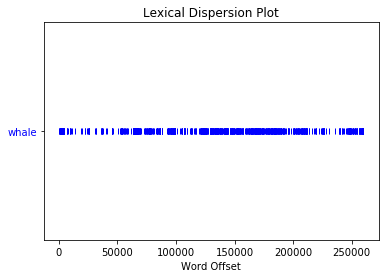

In [53]:
import numpy
%matplotlib inline
text1.dispersion_plot(["whale"])

In [56]:
text1.count("whale")/len(text1)

0.003473673313677301

#### 4.Challenge!
Create a dispersion plot for the terms ``"citizens", "democracy", "freedom", "duties"`` and ``"America"`` in the inaugural address corpus. What do you think it tells you?

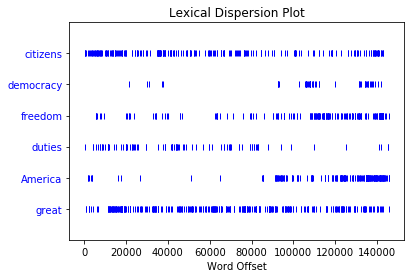

In [57]:
text4.dispersion_plot(["citizens","democracy", "freedom", "duties","America","great"])

## Frequency Distribution


We can use Python's ability to perform statistical analysis of data to do further exploration of vocabulary. For instance, we might want to be able to find the most common or least common words in a text. We'll start by looking at frequency distribution.

In [58]:
from nltk.probability import FreqDist
from collections import Counter
fdist1 = FreqDist(text1)

In [63]:
fdist1.most_common()[30:100]

[('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('more', 501),
 ('Ahab', 501),
 ('."', 489),
 ('no', 484),
 ('them', 471),
 ('ye', 460),
 ('what', 442),
 ('old', 436),
 ('sea', 433),
 ('would', 421),
 ('if', 421),
 ('been', 415),
 ('we', 413),
 ('other', 412),
 ('over', 403),
 ('these', 381),
 ('will', 379),
 ('its', 372),
 ('And', 369),
 ('down', 364),
 ('only', 360),
 ('such', 336),
 ('head', 335),
 ('though', 335),
 ('boat', 330),
 ('her', 329),
 ('time', 324),
 ('any', 320),
 ('who', 319),
 ('long', 

In [64]:
fdist1["whale"]

906

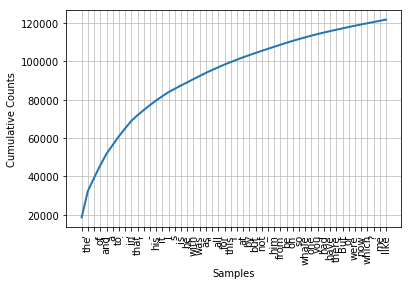

In [66]:
fdist1.plot(50,cumulative = True)

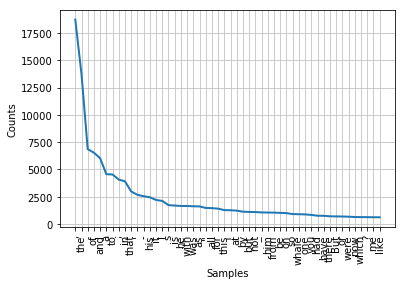

In [67]:
fdist1.plot(50,cumulative = False)

## Key Concepts: Tokenization
In general, Python regards a text file as a single long string of characters. Tokenization breaks text into words that the computer can understand as discrete units. Here is an example of one of NLTK's tokenizers at work:

First, we import the special twitter tokenizer from nltk

In [69]:
from nltk.tokenize.casual import (TweetTokenizer, casual_tokenize)

Next, save a tweet as a variable. In computer programming, variables are data (e.g. “PM @TurnbullMalcolm: Under changes agreed...”) paired with an associated symbolic name or identifier (e.g. 'tweet' in the code below). We'll learn more about these later, but here's how you assign data a variable. I've given my tweet the variable name 'tweet'.

In [70]:
tweet = "PM @TurnbullMalcolm: Under changes agreed to today, it's 'inconceivable' Brighton terrorist would have got parole. @theheraldsun #auspol" 

'Call' (programmer speak) your tweet to check it's saved

In [71]:
tweet

"PM @TurnbullMalcolm: Under changes agreed to today, it's 'inconceivable' Brighton terrorist would have got parole. @theheraldsun #auspol"

Now we use our special tweet tokenizer to tell the computer to recognise my tweet as a list of words, not a long string of characters. To do this a create and save another variable. This is common practice.

In [72]:
tweetTokens = casual_tokenize(tweet)

Now call your new variable and observe how it differs from when you called the first variable 'tweet'

In [73]:
tweetTokens

['PM',
 '@TurnbullMalcolm',
 ':',
 'Under',
 'changes',
 'agreed',
 'to',
 'today',
 ',',
 "it's",
 "'",
 'inconceivable',
 "'",
 'Brighton',
 'terrorist',
 'would',
 'have',
 'got',
 'parole',
 '.',
 '@theheraldsun',
 '#auspol']

_
Compare the output of the variable sentence and the variable words. Notice that in the latter, the words are represented as a list._

### _Challenge!_
Try running `tweet[1]` and the `tweet_tokens[1]` in separate cells. Observe what happens. What unit is each variable count? Try changing the numbers in the square brackets. Have you noticed that Python starts counting at 0?
Using the `casual_tokenize()` function of nltk has changed our sentence into a list of words that can be searched, rather than characters. We saved our initial sentence as ‘tweet’ and the list of tokenised words as ‘tweet_tokens’, using numbers within the square brackets allows us to ask the computer what value (character or word) is at a particular position in the list. This is called indexing. A list in computer programming is an abstract data type that represents a countable number of ordered values. You can learn more about list function and data structures in Python [here](https://docs.python.org/3/tutorial/datastructures.html).

In [76]:
tweet[1]

'M'

In [77]:
tweetTokens[1]

'@TurnbullMalcolm'

In [78]:
tweet[0]

'P'

## Python Basics: Lists
Python treats a text as a long list of words. First, we'll make some lists of our own, to give you an idea of how a list behaves.

In [79]:
len(tweetTokens)

22

The opening sentences of each of our texts have been pre-defined for you. You can inspect them by typing in `sent2` etc.
You can add lists together, creating a new list containing all the items from both lists. You can do this by typing out the two lists or you can add two or more pre-defined lists. This is called concatenation.

In [82]:
sent2 + sent1

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'Call',
 'me',
 'Ishmael',
 '.']

We can also add an item to the end of a list by appending. When we ``append()``, the list itself is updated.

In [84]:
sent1.append("Please")
sent1

['Call', 'me', 'Ishmael', '.', 'Please', 'Please']

#### Indexing Lists
We can navigate this list with the help of indexes. Just as we can find out the number of times a word occurs in a text, we can also find where a word first occurs. We can navigate to different points in a text without restriction, so long as we can describe where we want to be.

In [85]:
tweetTokens.index("@TurnbullMalcolm")

1

As well as pulling out individual items from a list, indexes can be used to pull out selections of text from a large corpus to inspect. We call this slicing.

In [86]:
print(tweetTokens[16:22])

['have', 'got', 'parole', '.', '@theheraldsun', '#auspol']


In [87]:
print(tweetTokens[:22])

['PM', '@TurnbullMalcolm', ':', 'Under', 'changes', 'agreed', 'to', 'today', ',', "it's", "'", 'inconceivable', "'", 'Brighton', 'terrorist', 'would', 'have', 'got', 'parole', '.', '@theheraldsun', '#auspol']


If we're asking for the beginning or end of a text, we can leave out the first or second number. For instance, [:5] will give us the first five items in a list while [8:] will give us all the elements from the eighth to the end.

In [88]:
print(tweetTokens[5:])

['agreed', 'to', 'today', ',', "it's", "'", 'inconceivable', "'", 'Brighton', 'terrorist', 'would', 'have', 'got', 'parole', '.', '@theheraldsun', '#auspol']


Note that the first element in the list is zero. This is because we are telling Python to go zero steps forward in the list. If we use an index that is too large (that is, we ask for something that doesn't exist), we'll get an error. We can modify elements in a list by assigning new data to one of its index values. We can also replace a slice with new material.